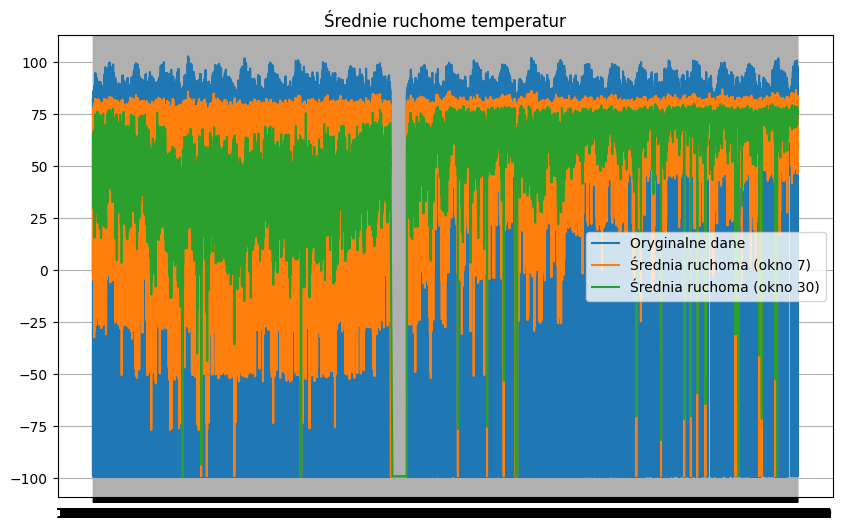

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('city_temperature.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})

# Sortowanie danych po dacie
data = data.sort_values(by='Date')
data.set_index('Date', inplace=True)

# Obliczanie średnich ruchomych
data['MA_7'] = data['AvgTemperature'].rolling(window=7).mean()
data['MA_30'] = data['AvgTemperature'].rolling(window=30).mean()

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(data['AvgTemperature'], label="Oryginalne dane")
plt.plot(data['MA_7'], label="Średnia ruchoma (okno 7)")
plt.plot(data['MA_30'], label="Średnia ruchoma (okno 30)")
plt.title("Średnie ruchome temperatur")
plt.legend()
plt.grid()
plt.show()

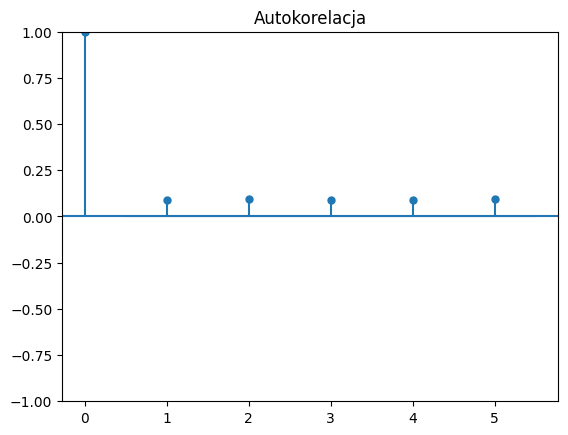

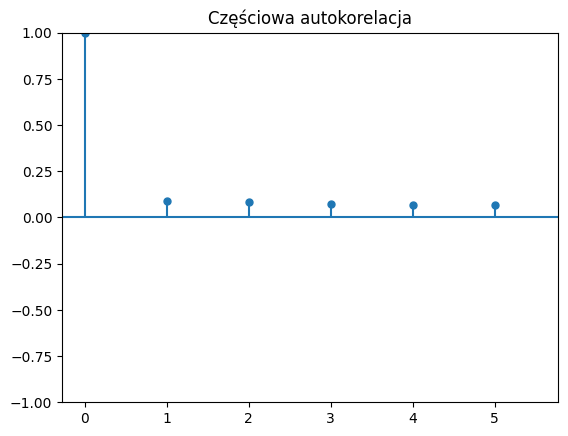

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF i PACF
plot_acf(data['AvgTemperature'], lags=5, title="Autokorelacja")
plot_pacf(data['AvgTemperature'], lags=5, title="Częściowa autokorelacja", method='ywm')
plt.show()

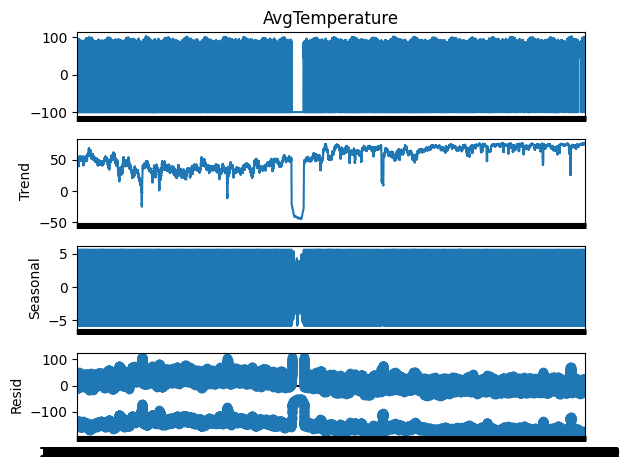

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Dekompozycja addytywna
result = seasonal_decompose(data['AvgTemperature'], model='additive', period=365)
result.plot()
plt.show()